# Алгоритм кратчайшего незамкнутого пути (КНП)

1. Найти пару точек `(i,j)` с наименьшим `ρij` и соединить их ребром; 
2. пока в выборке остаются изолированные точки
        найти изолированную точку, ближайшую к некоторой неизолированной;
        соединить эти две точки ребром; 
3. удалить `K − 1` самых длинных рёбер;

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import networkx as nx
import matplotlib.pyplot as plt

In [101]:
def first_connection(matrix, tree):
    connection = np.zeros(n)
    minim = matrix[0][1] 
    i_min, j_min = 0, 1
    for i in range(n):
        for j in range(i + 1, n):
            if minim > matrix[i][j]:
                minim = matrix[i][j]
                i_min, j_min = i, j
    tree[i_min][j_min] = matrix[i_min][j_min] = minim
    tree[j_min][i_min] = matrix[j_min][i_min] = minim
    connection[i_min] = connection[j_min] = 1
    return connection

In [102]:
def connect_all(matrix, tree, connection): 
    minim = matrix[0][1] 
    i_min, j_min = 0, 1
    for i in range(n):
        if connection[i] == 1:
            for j in range(n):
                if connection[j] == 0:
                    if minim > matrix[i][j]:
                        minim = matrix[i][j]
                        i_min, j_min = i, j
    tree[i_min][j_min] = matrix[i_min][j_min] = minim
    tree[j_min][i_min] = matrix[j_min][i_min] = minim
    connection[i_min] = connection[j_min] = 1

In [103]:
def delete_connection(tree):
    maxim = 0
    i_max, j_max = 0, 0
    for i in range(n):
        for j in range(i + 1, n):
            if tree[i][j] > maxim:
                maxim = tree[i][j]
                i_max, j_max = i, j
    tree[i_max][j_max] = tree[j_max][i_max] = 0

In [104]:
def cluster(k, tree, clust_pnt): 
    clusters = []
    for i in range(n): 
        for j in range(n): 
            if tree[i][j] == 0: 
                continue
            if len(clusters) == 0:
                clusters.append(i)
                clusters.append(j)
                tree[i][j] = tree[j][i] = 0 
    m = clusters[0]
    old_m = -1
    while old_m != m:
        old_m = m
        for j in range(n):
            if tree[m][j] == 0: 
                continue
            else:
                clusters.append(j)
                tree[m][j] = tree[j][m] = 0
                m = j
    m = clusters[1]
    old_m = -1
    while old_m != m:
        old_m = m
        for j in range(n):
            if tree[m][j] == 0: 
                continue
            else:
                clusters.append(j)
                tree[m][j] = tree[j][m] = 0
                m = j
    for i in clusters:
        clust_pnt[i] = k

In [105]:
def draw_graph(tree, n):
    G = nx.Graph(strict=False)
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(n):
            if tree[i][j] != 0:
                G.add_edge(i,j, matrix=tree[i][j])
                G.add_edges_from([(i, j, {'matrix': tree[i][j]})])
                tree[i][j] = tree[j][i] = 0 
    nx.draw_circular(G, with_labels=True)
    pos = nx.circular_layout(G)
    edge_labels = nx.get_edge_attributes(G,'matrix')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)

In [106]:
def KNP(matrix, n, k):
    tree = [[0 for i in range(n)] for j in range(n)]
    
    connection = first_connection(matrix, tree)
    
    while 0 in connection:
        connect_all(matrix, tree, connection)
        
    for i in range(k - 1):
        delete_connection(tree)
        
    clust_pnt = np.zeros(n)
    old_tree = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            old_tree[i][j] = tree[i][j]
            
    for i in range(1, k):
        cluster(i, tree, clust_pnt)
        
    draw_graph(old_tree, n)

In [107]:
n, k = 10, 2 
matrix = np.zeros((n, n)) 
for i in range(n): 
    for j in range(i + 1, n): 
        matrix[i][j] = matrix[j][i] = np.random.randint(1, 100) 
print(matrix) 

[[ 0. 91. 26. 30. 85. 99. 86. 84. 35. 56.]
 [91.  0.  1. 55. 27. 54. 83. 52. 83. 23.]
 [26.  1.  0. 77. 41. 79. 13. 97. 92. 28.]
 [30. 55. 77.  0. 32. 52. 65. 10. 15. 62.]
 [85. 27. 41. 32.  0. 44. 75. 50. 32. 57.]
 [99. 54. 79. 52. 44.  0. 56. 93. 10.  7.]
 [86. 83. 13. 65. 75. 56.  0. 34. 66. 47.]
 [84. 52. 97. 10. 50. 93. 34.  0. 48. 15.]
 [35. 83. 92. 15. 32. 10. 66. 48.  0. 46.]
 [56. 23. 28. 62. 57.  7. 47. 15. 46.  0.]]


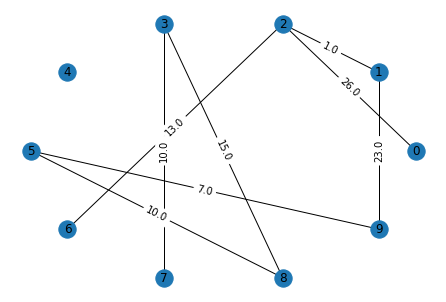

In [108]:
KNPModel = KNP(matrix, n, k)

In [ ]:
# first_connection() 
# for i in range(n-2): 
#     connect_all() 
# for i in range(k-1): 
#     delete_connection() 
# print(connection) 